# Data Visualization using Matplotlib and Seaborn

### Useful Resources
- https://matplotlib.org/
- https://matplotlib.org/stable/gallery/index.html
- https://matplotlib.org/stable/plot_types/index.html
- https://seaborn.pydata.org/examples/index.html
- https://github.com/mwaskom/seaborn-data
- https://seaborn.pydata.org/index.html
- https://github.com/garrettj403/SciencePlots


In [1]:
import numpy as np
import pandas as pd

# matplotlib package
import matplotlib.pyplot as plt

# seaborn package
import seaborn as sns

# if you’re using Jupyter Lab, it’s a good idea to include the %matplotlib inline magic command to ensure that your plots render directly in the notebook. 
# This is especially useful for Matplotlib plots as it helps display static images of your plots within the Jupyter environment.
%matplotlib inline

## 1. Matplotlib

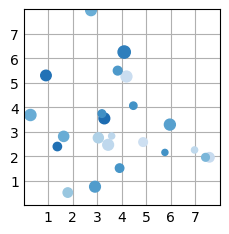

In [ ]:

plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

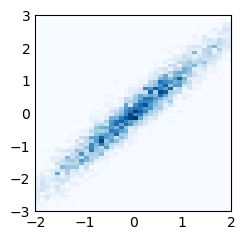

In [3]:
plt.style.use('_mpl-gallery-nogrid')

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

# plot:
fig, ax = plt.subplots()

ax.hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))

ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

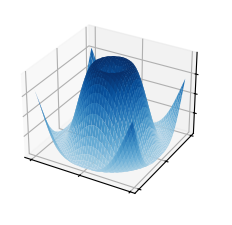

In [4]:
from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

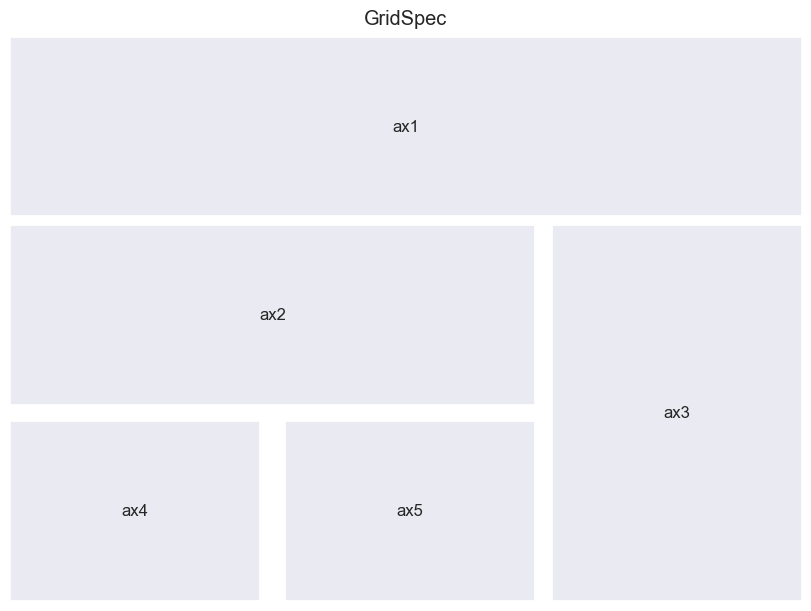

In [10]:
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(8, 6), layout="constrained")

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

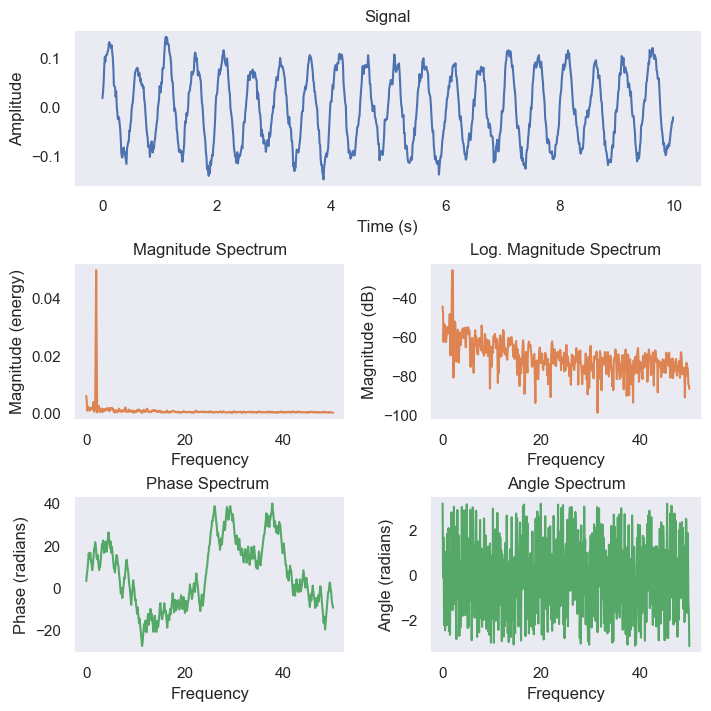

In [8]:
np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig = plt.figure(figsize=(7, 7), layout='constrained')
axs = fig.subplot_mosaic([["signal", "signal"],
                          ["magnitude", "log_magnitude"],
                          ["phase", "angle"]])

# plot time signal:
axs["signal"].set_title("Signal")
axs["signal"].plot(t, s, color='C0')
axs["signal"].set_xlabel("Time (s)")
axs["signal"].set_ylabel("Amplitude")

# plot different spectrum types:
axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(s, Fs=Fs, color='C1')

axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs["phase"].set_title("Phase Spectrum ")
axs["phase"].phase_spectrum(s, Fs=Fs, color='C2')

axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(s, Fs=Fs, color='C2')

plt.show()

## Exercise 1

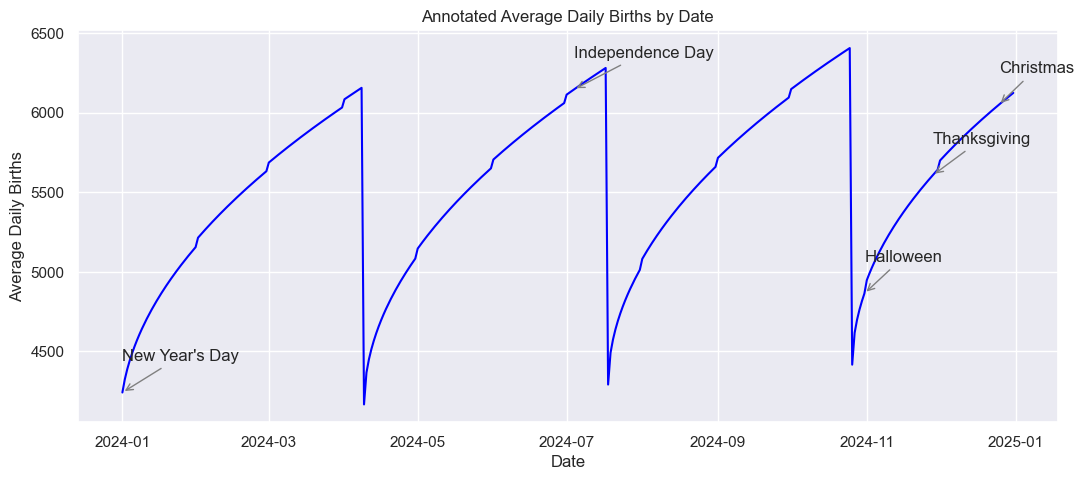

In [11]:
# Sample data for average daily births by date
dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
births = 4000 + 500 * (pd.Series(dates).dt.month / 12) + 200 * pd.Series(dates).dt.dayofyear.mod(100) ** 0.5
births.index = dates

# Plotting the data
plt.figure(figsize=(10, 4))
plt.plot(births.index, births, color='blue')
plt.title("Annotated Average Daily Births by Date")
plt.xlabel("Date")
plt.ylabel("Average Daily Births")

# Adding annotations
important_dates = {
    "New Year's Day": '2024-01-01',
    "Independence Day": '2024-07-04',
    "Halloween": '2024-10-31',
    "Thanksgiving": '2024-11-28',
    "Christmas": '2024-12-25'
}

for label, date in important_dates.items():
    plt.annotate(label, xy=(pd.to_datetime(date), births[date]), 
                 xytext=(pd.to_datetime(date), births[date] + 200),
                 arrowprops=dict(arrowstyle="->", color='gray'))

plt.grid(True)
plt.show()

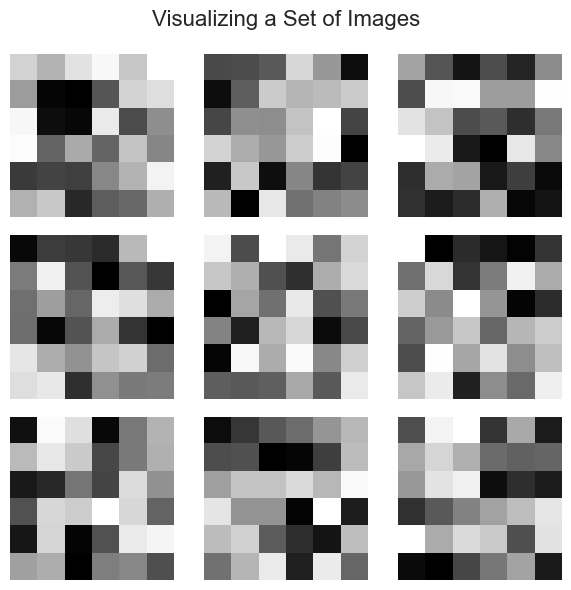

In [12]:
# Generating random image data for demonstration
num_images = 25
images = [np.random.rand(6, 6) for _ in range(num_images)]

# Plotting images in a grid
fig, axes = plt.subplots(3, 3, figsize=(6,6))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')  # Hiding ticks

plt.suptitle("Visualizing a Set of Images", fontsize=16)
plt.tight_layout()
plt.show()

## 2. Seaborn

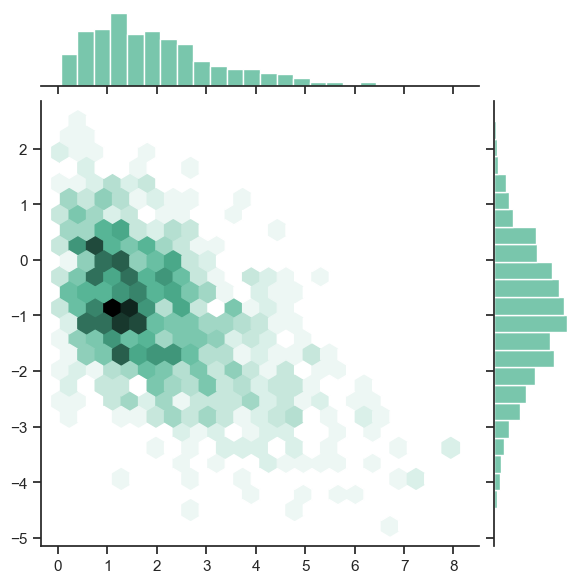

In [6]:

sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

<Axes: >

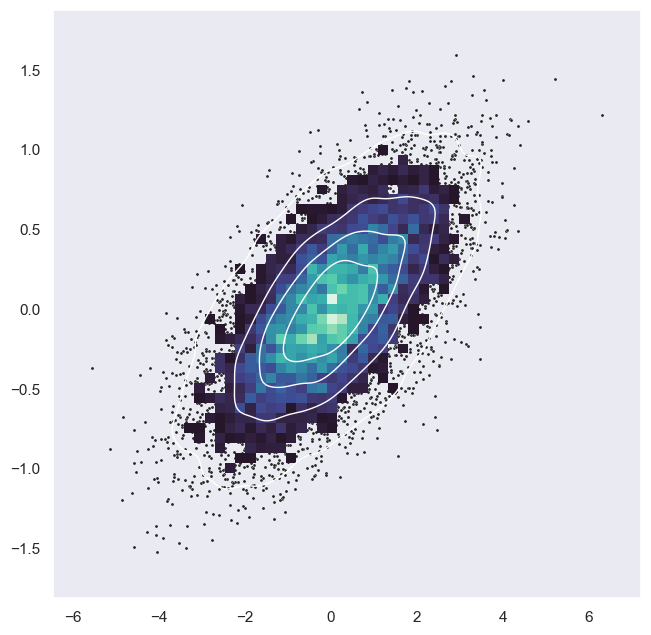

In [7]:
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

## Exercise 2


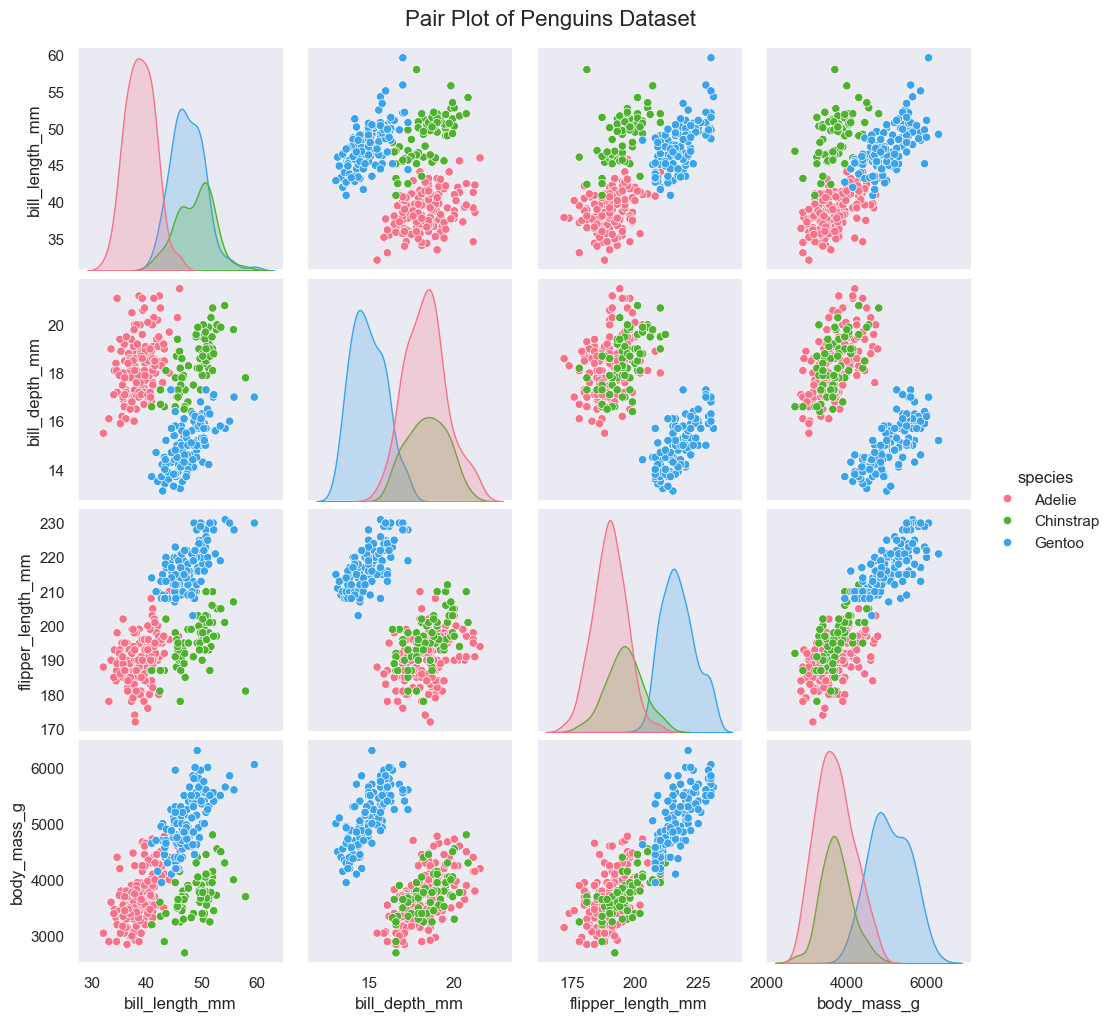

In [13]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Create a pair plot
sns.pairplot(penguins, hue='species', palette='husl')

plt.suptitle('Pair Plot of Penguins Dataset', y=1.02, fontsize=16)
plt.show()

C:\Users\l'zh\AppData\Local\Temp\ipykernel_13064\316940664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='flipper_length_mm', data=penguins, palette='Set2')


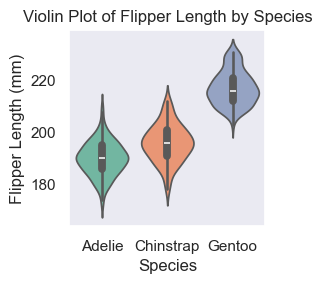

In [14]:
# Create a violin plot to show the distribution of flipper length across species
sns.violinplot(x='species', y='flipper_length_mm', data=penguins, palette='Set2')

plt.title('Violin Plot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()


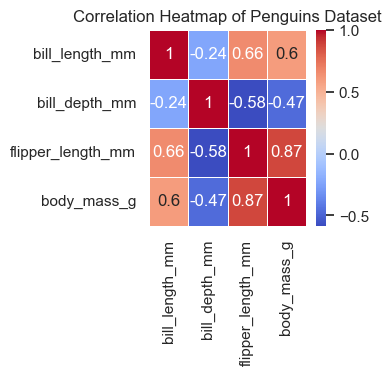

In [15]:
# Drop non-numeric columns
penguins_numeric = penguins.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = penguins_numeric.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Penguins Dataset')
plt.show()